## ***Plan of Action***

***- Imputation***

***- Feature Selection***

***- Dimensionality Reduction***

***- Exploratory Data Analysis***

***- Dealing with outliers***

***- Feature Transformation*** (Standardization/Normalization)

***- Model Building*** (Iterative process)

***- Cross Validating*** (Iterative process)

***- Builing secure deployment ready pipelines***

***- Exporting binary file for production*** (Testing Environment)

![](1.jpg)

![](2.jpg)

![](3.jpg)

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(display='diagram')
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet,ARDRegression
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor, BaggingRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error
from xgboost import XGBRegressor
from matplotlib import rcParams
import joblib

import scipy.stats as stats

In [3]:
data= pd.read_csv('./data.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.rename(columns={'csMPa': 'strength'}, inplace=True)
print(data.shape)
data.head()

(1030, 9)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Data Imputation

In [7]:
data.isnull().sum(axis = 0)

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
strength            0
dtype: int64

## Split - Train, Test

In [8]:
data, test = train_test_split(data,test_size=0.1, random_state=42)
data.shape

(927, 9)

In [9]:
test.shape

(103, 9)

## EDA - 1

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 806 to 860
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            927 non-null    float64
 1   slag              927 non-null    float64
 2   flyash            927 non-null    float64
 3   water             927 non-null    float64
 4   superplasticizer  927 non-null    float64
 5   coarseaggregate   927 non-null    float64
 6   fineaggregate     927 non-null    float64
 7   age               927 non-null    int64  
 8   strength          927 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 72.4 KB


In [11]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,282.693851,72.906472,54.478209,181.289320,6.259439,973.425351,773.512729,45.304207,35.977821
std,106.213785,85.849376,64.448854,21.470616,5.978929,78.650706,80.811312,61.562434,16.741837
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,728.450000,10.500000,23.790000
50%,275.100000,22.000000,0.000000,185.000000,6.400000,968.000000,779.300000,28.000000,34.490000
75%,357.500000,142.800000,118.300000,192.000000,10.300000,1040.000000,825.000000,56.000000,46.215000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'strength'],
      dtype='object')

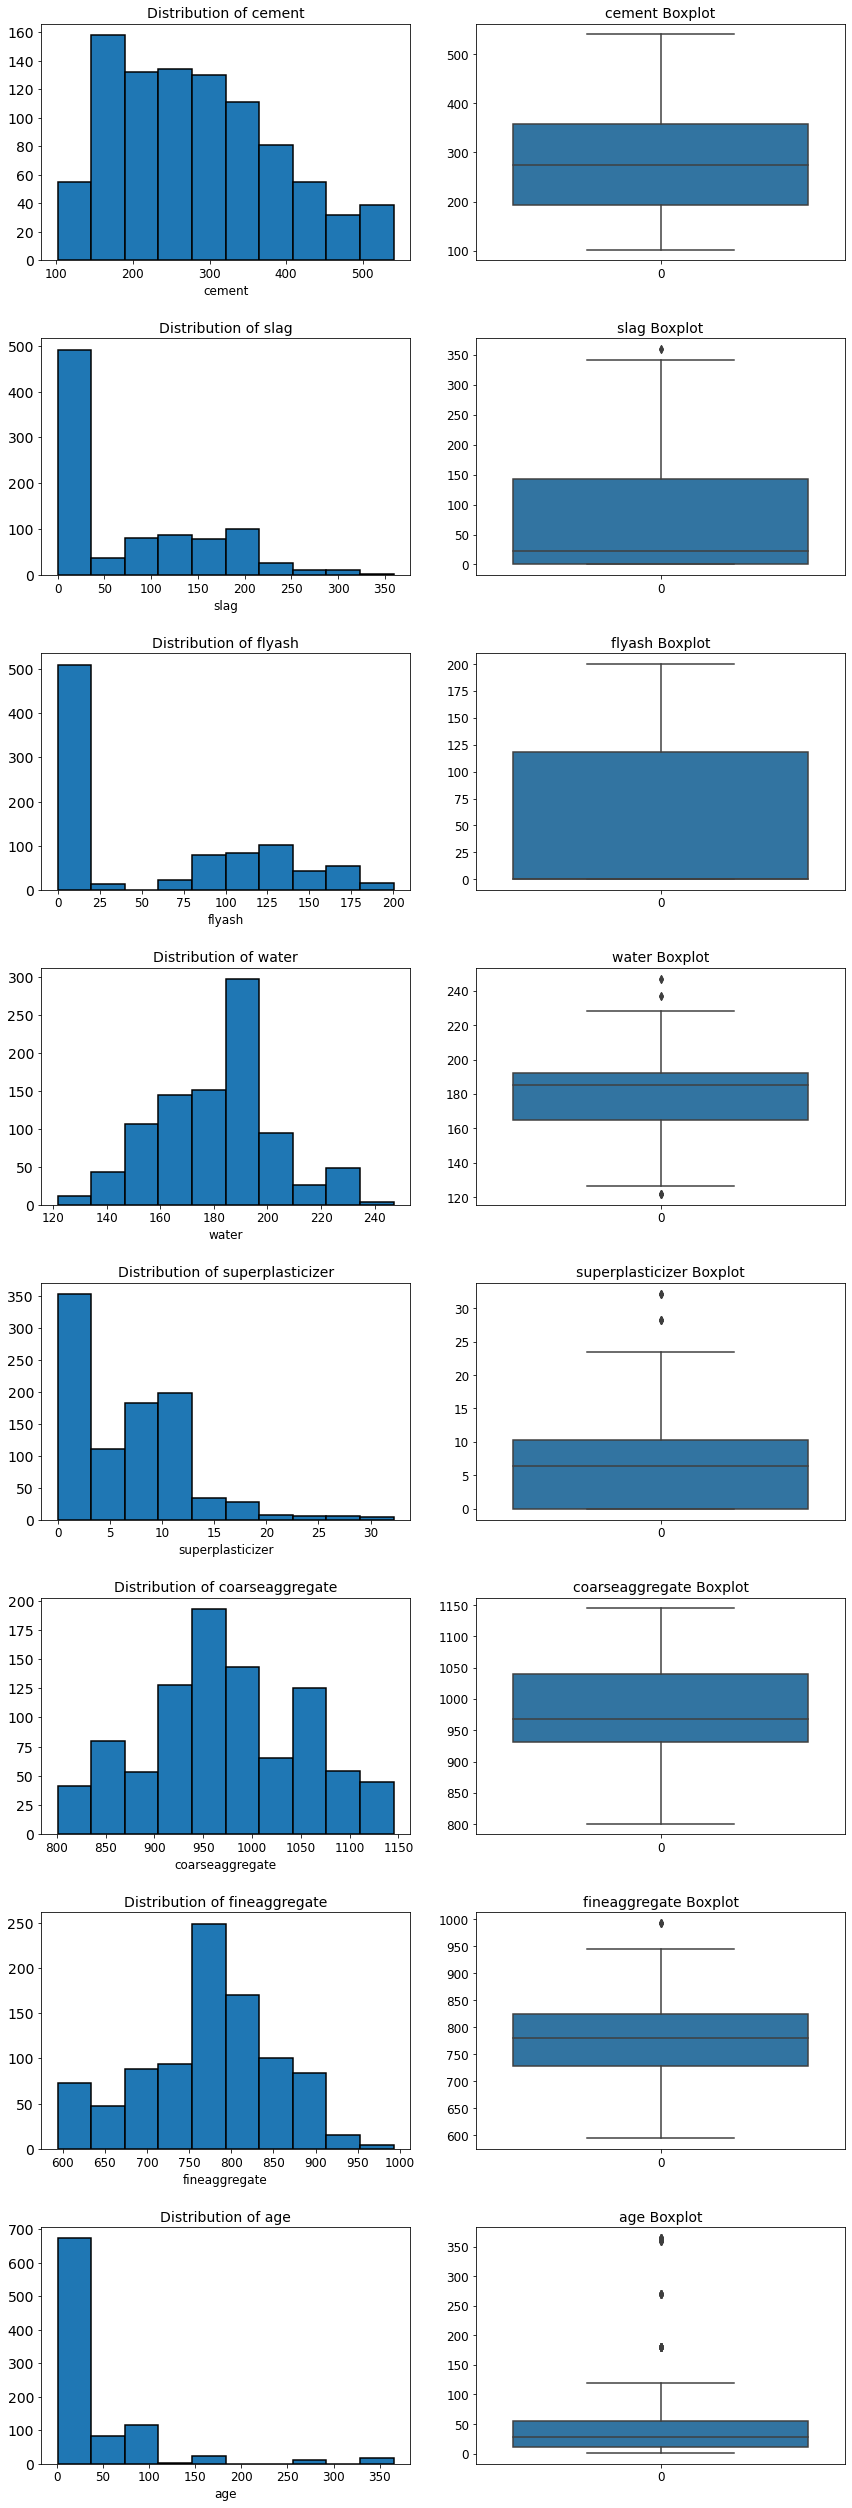

In [13]:
plt.figure(figsize=(12,35))
plt.rcParams.update({'font.size': 12})

for i in enumerate(data.columns[:-1]):
    
    plt.subplot(8,2,(2*i[0])+1);
    data[i[1]].hist(grid=False,xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=14);
    plt.xlabel(f"{i[1]}", fontsize = 12);
    plt.tight_layout(h_pad=2, w_pad=2)
    
    plt.subplot(8,2,(2*i[0])+2);
    sns.boxplot(data[i[1]]);
    plt.title(f"{i[1]} Boxplot", fontsize=14);
    plt.tight_layout(h_pad=2, w_pad=2)

### Take aways:

- Cement, water, coarse aggregate, and fine aggregate could exhibit a normal distribution following appropriate transformations.
- Transformations might reveal a bi-modal distribution in the slag and fly ash columns.
- The Superplasticizer column distinctly conforms to a tweedie distribution.
- The Age column can be discretized into bins and then transformed into a categorical feature.

In [14]:
for col in data.columns[:-1]:
    print(f'Maximum for {col}: {(data[col].quantile(0.75)+ 1.5*(data[col].quantile(0.75) - data[col].quantile(0.25)))}')
    print(f'Minimum for {col}: {(data[col].quantile(0.25)- 1.5*(data[col].quantile(0.75) - data[col].quantile(0.25)))}')
    print()

Maximum for cement: 605.75
Minimum for cement: -56.25

Maximum for slag: 357.0
Minimum for slag: -214.20000000000002

Maximum for flyash: 295.75
Minimum for flyash: -177.45

Maximum for water: 232.64999999999998
Minimum for water: 124.25000000000001

Maximum for superplasticizer: 25.75
Minimum for superplasticizer: -15.450000000000001

Maximum for coarseaggregate: 1202.0
Minimum for coarseaggregate: 770.0

Maximum for fineaggregate: 969.8249999999999
Minimum for fineaggregate: 583.6250000000001

Maximum for age: 124.25
Minimum for age: -57.75



In [15]:
data[data['cement']>600].shape

(0, 9)

no outliers in cement column


In [17]:
data[data['slag']>350].shape

(2, 9)

2 outliers in slag 


In [18]:
data[data['slag']>350]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [19]:
data[data['water']<124].shape

(5, 9)

In [20]:
data[data['water']>230]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23


In [21]:
data[data['water']<124]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75


9 outliers in water column

In [22]:
data[data['superplasticizer']>25].shape

(9, 9)

9 in superlasticizer

In [23]:
data[data['superplasticizer']>25]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9


In [24]:
data[data['coarseaggregate']<770].shape

(0, 9)

no outliers in coarseaggregate column

In [25]:
data[data['fineaggregate']>970].shape

(5, 9)

In [26]:
data[data['fineaggregate']<583].shape

(0, 9)

In [27]:
data[data['fineaggregate']>970]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5


5 outliers in fineaggregate column

In [28]:
data[data['age']>124].shape

(52, 9)

In [29]:
data[data['age']>124]

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
66,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,360,44.70
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
755,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,180,71.62
25,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.30
603,339.0,0.0,0.0,197.0,0.0,968.0,781.0,180,36.45
762,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,32.72
60,304.0,76.0,0.0,228.0,0.0,932.0,670.0,270,54.38
620,254.0,0.0,0.0,198.0,0.0,968.0,863.0,365,29.79
621,307.0,0.0,0.0,193.0,0.0,968.0,812.0,180,34.49
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16


we can consider age above 124 as a separate bin

In [30]:
# Outlier Treatment

for idx, row in data.iterrows():
    if data.loc[idx, 'slag']> 350:
        data.loc[idx, 'slag'] = 350
        
    if data.loc[idx, 'water']> 230:
        data.loc[idx, 'water'] = 230
        
    if data.loc[idx, 'water']< 124:
        data.loc[idx, 'water'] = 124
        
    if data.loc[idx, 'superplasticizer']> 25:
        data.loc[idx, 'superplasticizer'] = 25
        
    if data.loc[idx, 'fineaggregate']> 970:
        data.loc[idx, 'fineaggregate'] = 970

## Feature Engineering

### Binning of Age Column

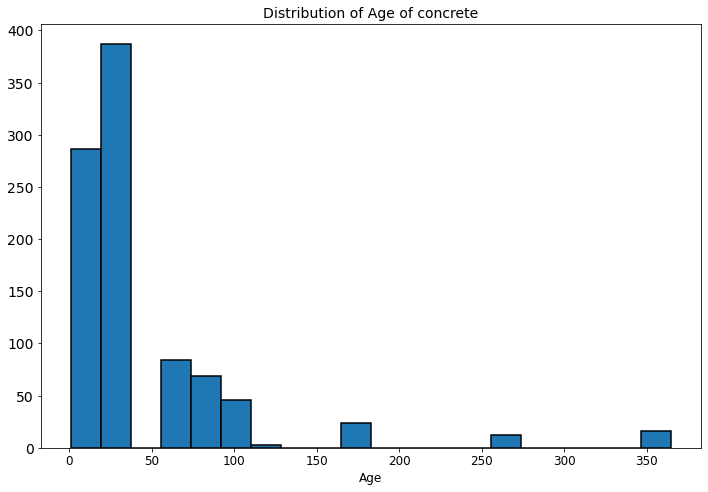

In [31]:
plt.figure(figsize=(10,7))
data['age'].hist(grid=False,xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black", bins=20)
plt.title(f"Distribution of Age of concrete",fontsize=14)
plt.xlabel(f"Age", fontsize = 12)
plt.tight_layout(h_pad=2, w_pad=2)

In [32]:
data['age'].value_counts()

28     387
3      118
7      112
56      84
14      54
90      48
100     46
180     24
91      21
270     12
365     10
360      6
120      3
1        2
Name: age, dtype: int64

In [33]:
for idx, row in data.iterrows():
    if data.loc[idx, 'age']> 120:
        data.loc[idx, 'age'] = 120
        
    if data.loc[idx, 'age']== 1:
        data.loc[idx, 'age'] = 2
        
    if data.loc[idx, 'age']== 3:
        data.loc[idx, 'age'] = 2
        
    if data.loc[idx, 'age']== 91:
        data.loc[idx, 'age'] = 90

In [34]:
data['age'].value_counts().index.tolist()

[28, 2, 7, 56, 90, 120, 14, 100]

In [35]:
mylist = [28, 2, 7, 56, 90, 120, 14, 100]
mydict = {}
mylist.sort()
for (x,y) in enumerate(mylist):
    mydict[y]=x
    
    
print(mydict)

d = 50
takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
print(takeClosest(d, mylist))
print(mydict[takeClosest(d, mylist)])


{2: 0, 7: 1, 14: 2, 28: 3, 56: 4, 90: 5, 100: 6, 120: 7}
56
4


In [36]:
for idx, row in data.iterrows():
    if data.loc[idx, 'age'] in data['age'].value_counts().index.tolist():
        data.loc[idx, 'age'] = mydict[data.loc[idx, 'age']]

In [37]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
806,382.0,0.0,0.0,185.0,0.0,1047.0,739.0,1,24.00
168,469.0,117.2,0.0,137.8,25.0,852.1,840.5,5,70.70
590,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,1,10.34
464,167.0,75.4,167.0,164.0,7.9,1007.3,770.1,6,56.81
998,304.8,0.0,99.6,196.0,9.8,959.4,705.2,3,30.12


# EDA 2

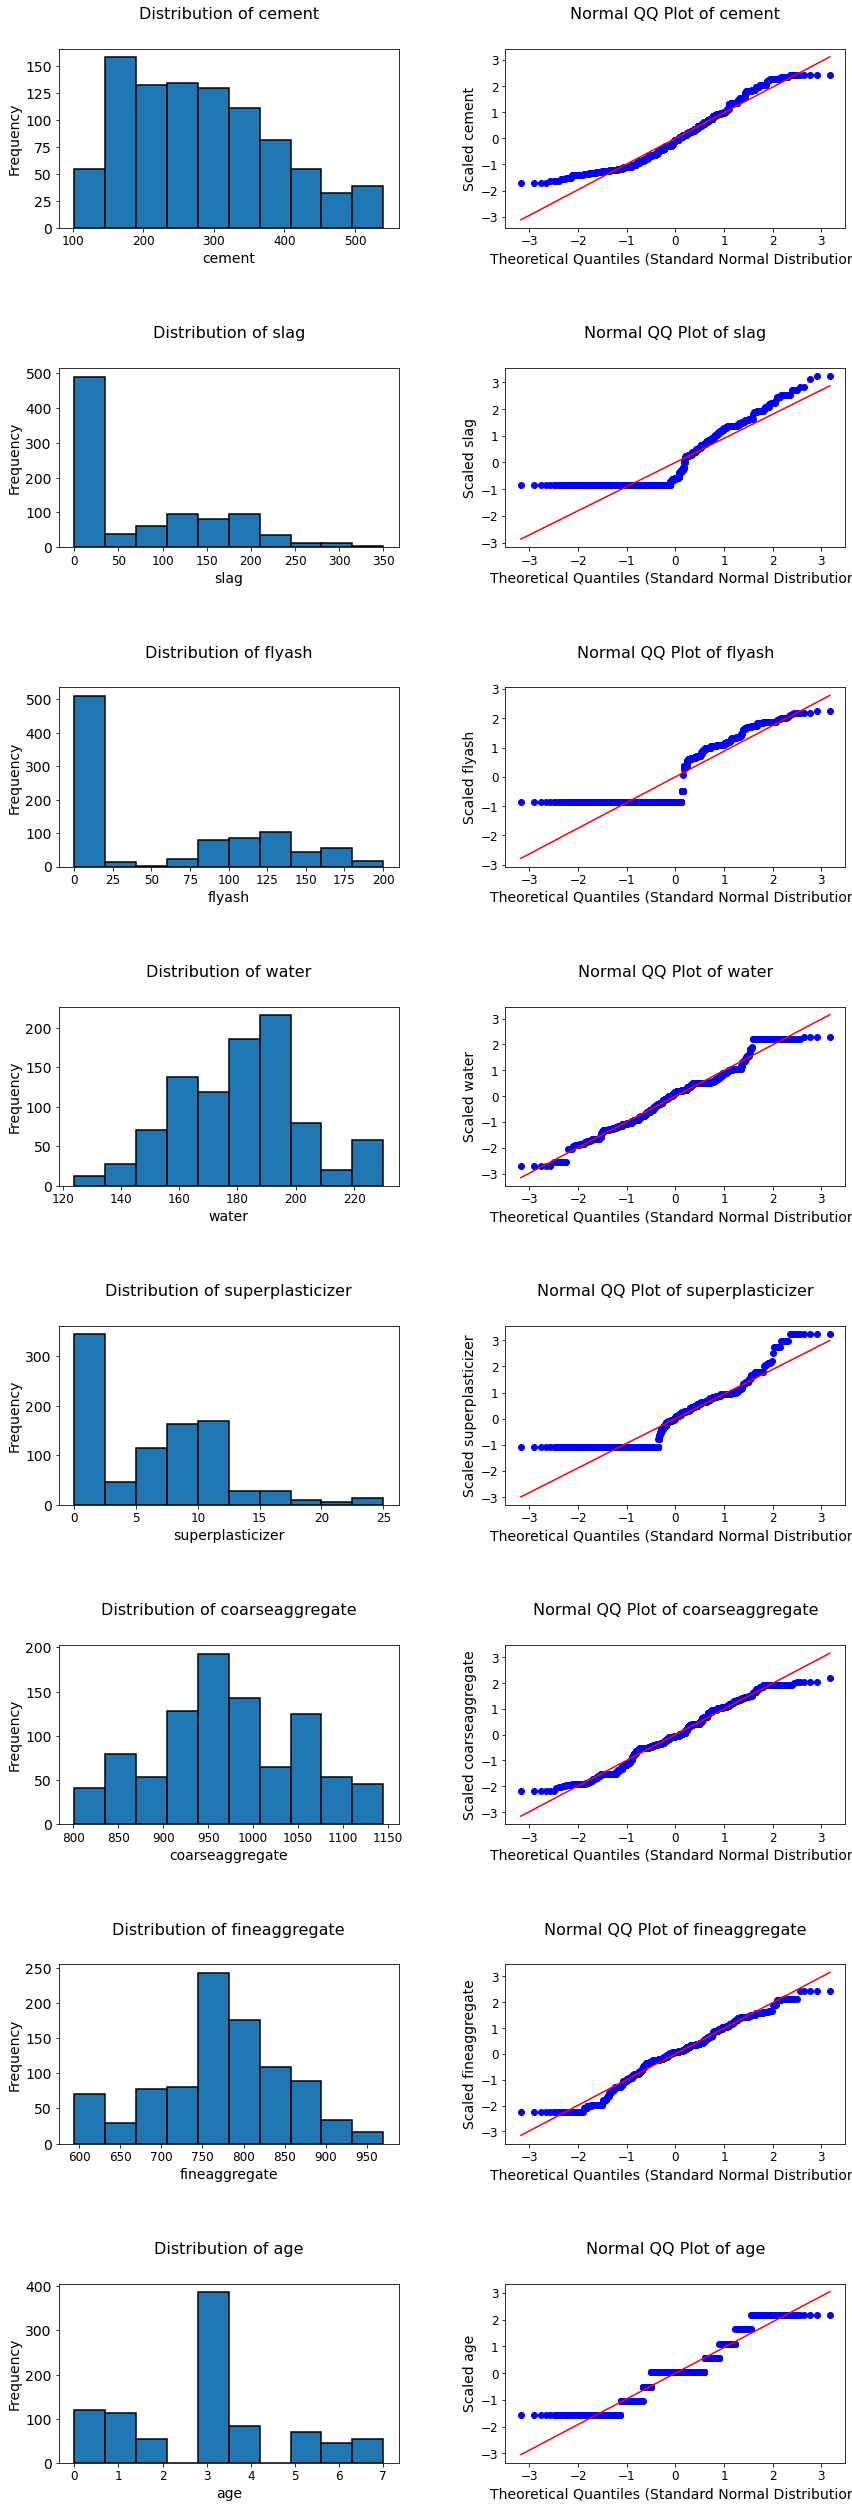

In [39]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
tempData = data.copy()
tempData = tempData.drop(['strength'],axis=1)
tempData = sc.fit_transform(tempData)

temp_df = pd.DataFrame(tempData, columns = data.columns[:-1])


plt.figure(figsize=(12,35))

for i in enumerate(data.columns[:-1]):
    
    plt.subplot(8,2,(2*i[0])+1);
    data[i[1]].hist(grid=False, xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=16,pad=30);
    plt.xlabel(f"{i[1]}",fontsize=14);
    plt.ylabel("Frequency",fontsize=14);
    plt.tight_layout(h_pad=5, w_pad=5)
    
    
    plt.subplot(8,2,int(f'{(2*i[0])+2}'))
    stats.probplot(temp_df[i[1]], dist='norm', plot=plt)
    plt.title(f'Normal QQ Plot of {i[1]}',fontsize=16,pad=30);
    plt.xlabel("Theoretical Quantiles (Standard Normal Distribution)",fontsize=14);
    plt.ylabel(f"Scaled {i[1]}",fontsize=14);

### Takeaways:

- Overall data is little bit right skewed. 
- The data needs to be standardized.
- Both the above requirements can be met by a feature transformation.

## Feature Selection

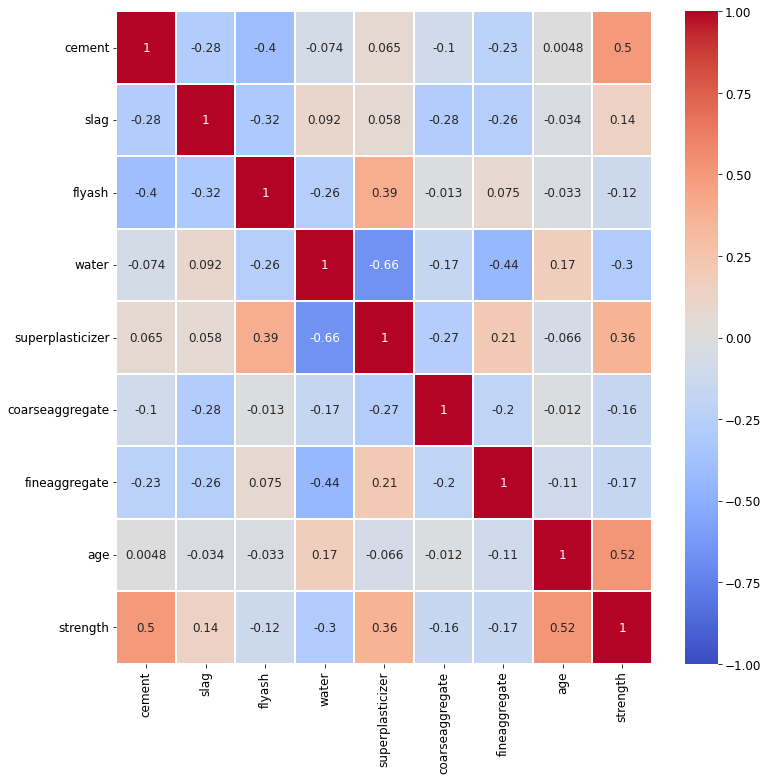

In [40]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, lw=0.2, edgecolor="white");

No feature to remove

## Feature Importance

<Figure size 1008x864 with 0 Axes>

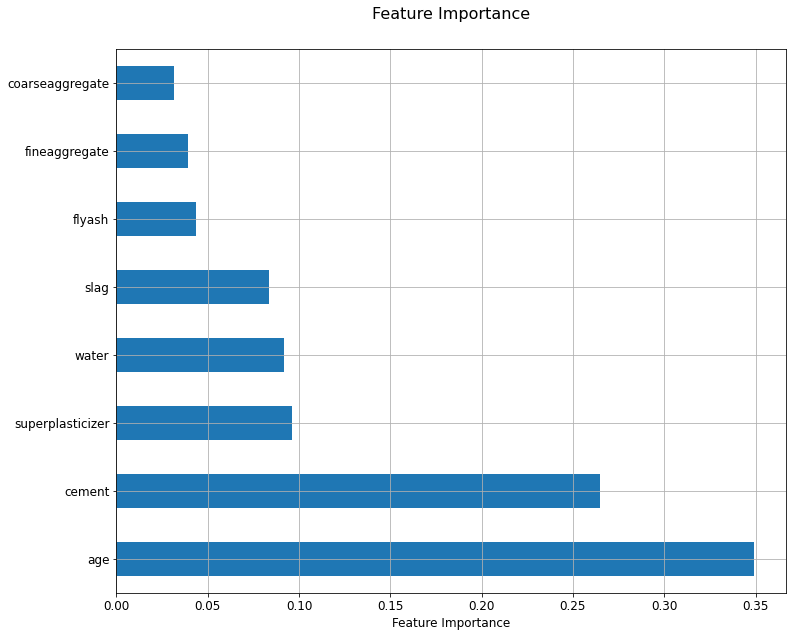

In [45]:
fig = plt.figure(figsize=(14,12))
model = ExtraTreesRegressor()
model.fit(data.iloc[:,:-1], data.iloc[:,-1])
fig = plt.figure(figsize=(12,10))
feature_imps = pd.Series(model.feature_importances_, index = data.iloc[:,:-1].columns)
feature_imps.nlargest(12).plot(kind='barh')
plt.grid(True)
plt.title("Feature Importance", pad=30, fontsize=16)
plt.xlabel('Feature Importance')
plt.plot()

# Feature Extraction

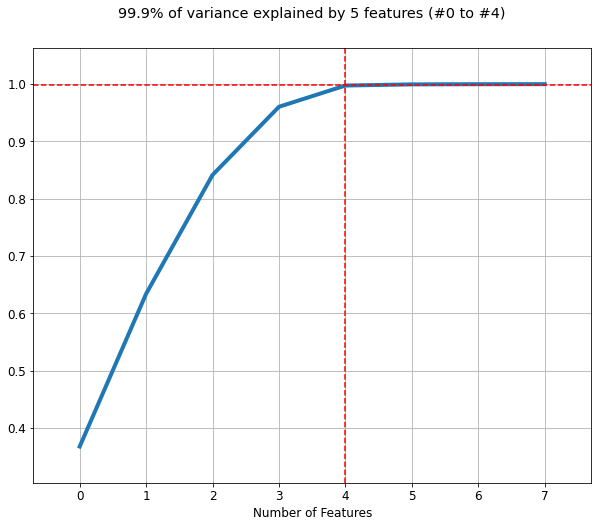

In [47]:
plt.figure(figsize=(10,8))
pca_dummy = PCA(n_components=None)
X_dummy = data.iloc[:,:-1].values
X_dummy = pca_dummy.fit_transform(X_dummy)
plt.plot(np.cumsum(pca_dummy.explained_variance_ratio_), linewidth=4)
plt.axhline(y = 0.999, c='r', linewidth =1.5, linestyle='--')
plt.axvline(x=4, c='r', linestyle = '--', linewidth =1.5)
plt.xlabel("Number of Features")
plt.margins(0.1)
plt.grid(True)
plt.title('99.9% of variance explained by 5 features (#0 to #4)', pad=30)
plt.plot()

Now we have two options:

- Handpick 5 best features out of the list. `Here, the domain knowledge could be of an advantage`

- Use PCA to extract 5 features from the list. `Here, we are safe from the potential loss of information`

**I would choose the first option as through domain knowledge, we penalize/regulate the model to learn only a particular type of relations with the features we believe are sufficient.**

In [48]:
data_handpicked = data[['cement', 'slag', 'water', 'superplasticizer', 'age', 'strength']]
data_handpicked.head()

,cement,slag,water,superplasticizer,age,strength
806,382.0,0.0,185.0,0.0,1,24.00
168,469.0,117.2,137.8,25.0,5,70.70
590,238.1,0.0,185.7,0.0,1,10.34
464,167.0,75.4,164.0,7.9,6,56.81
998,304.8,0.0,196.0,9.8,3,30.12


In [49]:
pca = PCA(n_components=5)
data_extracted = data.iloc[:,:-1].values
data_extracted = pca.fit_transform(data_extracted)
print(data_extracted.shape)

(927, 5)


In [50]:
data_extracted = pd.DataFrame(data_extracted, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
data_extracted['strength'] = data.iloc[:,-1].values
data_extracted.head()

,col1,col2,col3,col4,col5,strength
0,130.350653,-41.833122,-62.885769,-41.058813,19.739205,24.00
1,155.407347,65.814111,168.039034,-22.750047,-59.768433,70.70
2,-10.934231,-92.152341,-107.182964,-101.881147,34.736060,10.34
3,-131.523433,-49.254034,-49.503487,61.752776,-38.861490,56.81
4,43.542935,-36.109203,-33.907750,86.663022,31.408305,30.12


# Feature Transformation

In [51]:
from sklearn.preprocessing import PowerTransformer

transformer_handpicked = PowerTransformer(method='yeo-johnson', standardize=True)
transformer_extracted = PowerTransformer(method='yeo-johnson', standardize=True)

data_handpicked_transformed = transformer_handpicked.fit_transform(data_handpicked.iloc[:,:-1])
data_extracted_transformed = transformer_extracted.fit_transform(data_extracted.iloc[:,:-1])

In [52]:
data_handpicked_transformed = pd.DataFrame(data_handpicked_transformed, columns = data_handpicked.columns.tolist()[:-1])
data_handpicked_transformed['strength'] = data_handpicked['strength'].tolist()
print(data_handpicked_transformed.shape)
data_handpicked_transformed.head()

(927, 6)


,cement,slag,water,superplasticizer,age,strength
0,0.969178,-1.055997,0.184442,-1.235094,-1.030521,24.00
1,1.549287,0.927540,-2.070144,1.944042,1.081970,70.70
2,-0.290126,-1.055997,0.217182,-1.235094,-1.030521,10.34
3,-1.168066,0.741273,-0.806665,0.551291,1.526973,56.81
4,0.354638,-1.055997,0.696867,0.771486,0.113103,30.12


In [53]:
data_extracted_transformed = pd.DataFrame(data_extracted_transformed, columns = data_extracted.columns.tolist()[:-1])
data_extracted_transformed['strength'] = data_extracted['strength'].tolist()
print(data_extracted_transformed.shape)
data_extracted_transformed.head()

(927, 6)


,col1,col2,col3,col4,col5,strength
0,1.107525,-0.328651,-0.720546,-0.587472,0.579610,24.00
1,1.286080,0.746366,1.842310,-0.232233,-1.739864,70.70
2,0.032099,-0.989154,-1.292555,-1.827627,0.951372,10.34
3,-1.231834,-0.424100,-0.549354,0.958675,-1.091511,56.81
4,0.474691,-0.255662,-0.351224,1.251663,0.869388,30.12


# EDA - 3

### Visualizing Hand-Picked Data


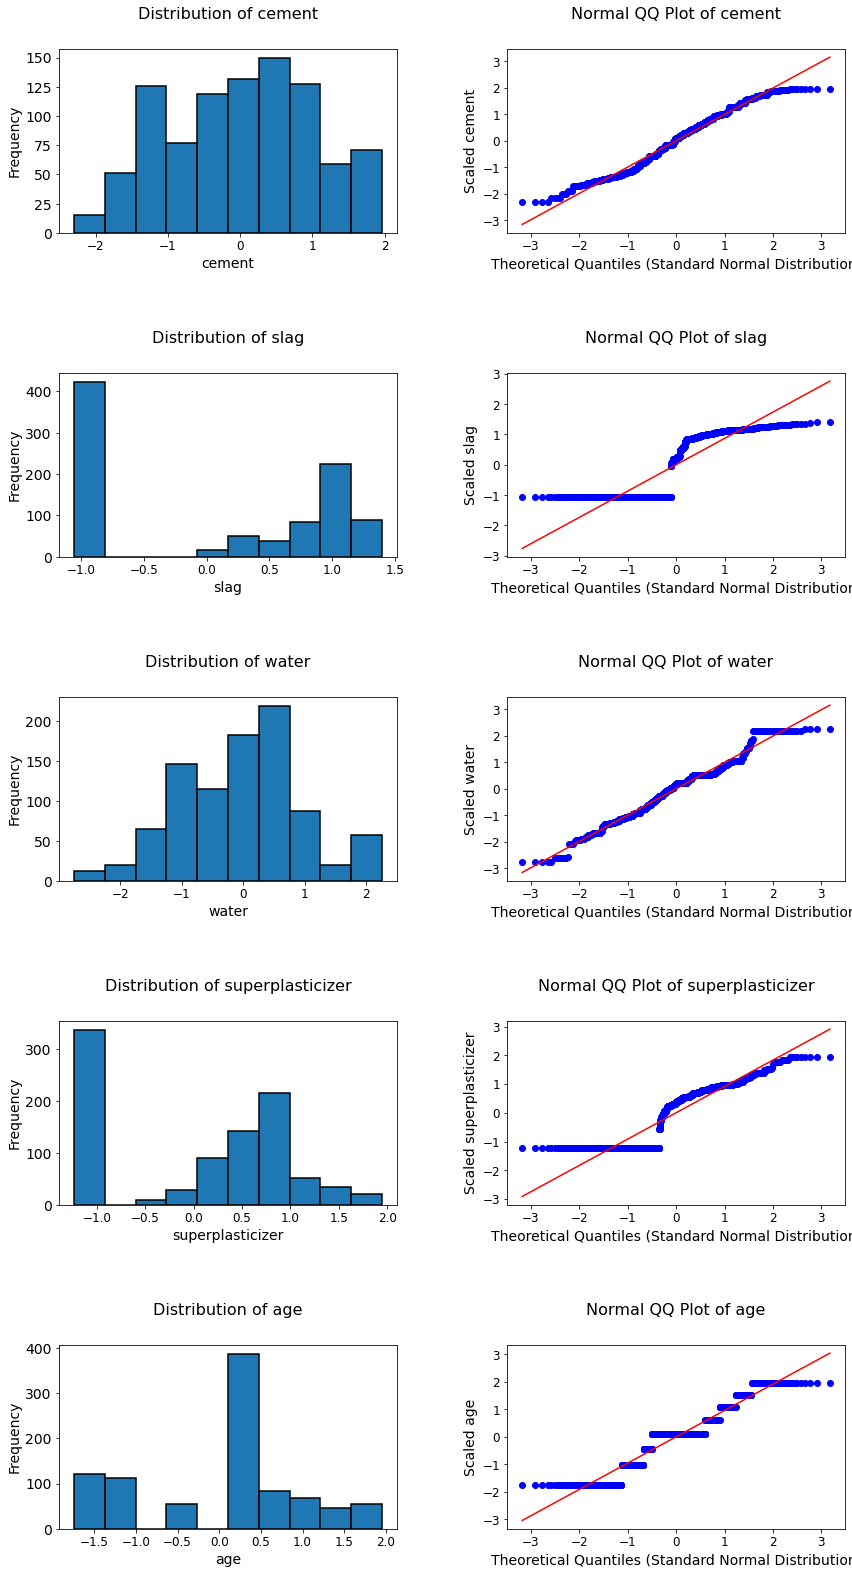

In [54]:
import scipy.stats as stats

plt.figure(figsize=(12,35))

for i in enumerate(data_handpicked_transformed.columns[:-1]):
    
    plt.subplot(8,2,(2*i[0])+1);
    data_handpicked_transformed[i[1]].hist(grid=False, xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black");
    plt.title(f"Distribution of {i[1]}",fontsize=16,pad=30);
    plt.xlabel(f"{i[1]}",fontsize=14);
    plt.ylabel("Frequency",fontsize=14);
    plt.tight_layout(h_pad=5, w_pad=5)
    
    
    plt.subplot(8,2,int(f'{(2*i[0])+2}'))
    stats.probplot(data_handpicked_transformed[i[1]], dist='norm', plot=plt)
    plt.title(f'Normal QQ Plot of {i[1]}',fontsize=16,pad=30);
    plt.xlabel("Theoretical Quantiles (Standard Normal Distribution)",fontsize=14);
    plt.ylabel(f"Scaled {i[1]}",fontsize=14);

### Visualizing Extracted Data

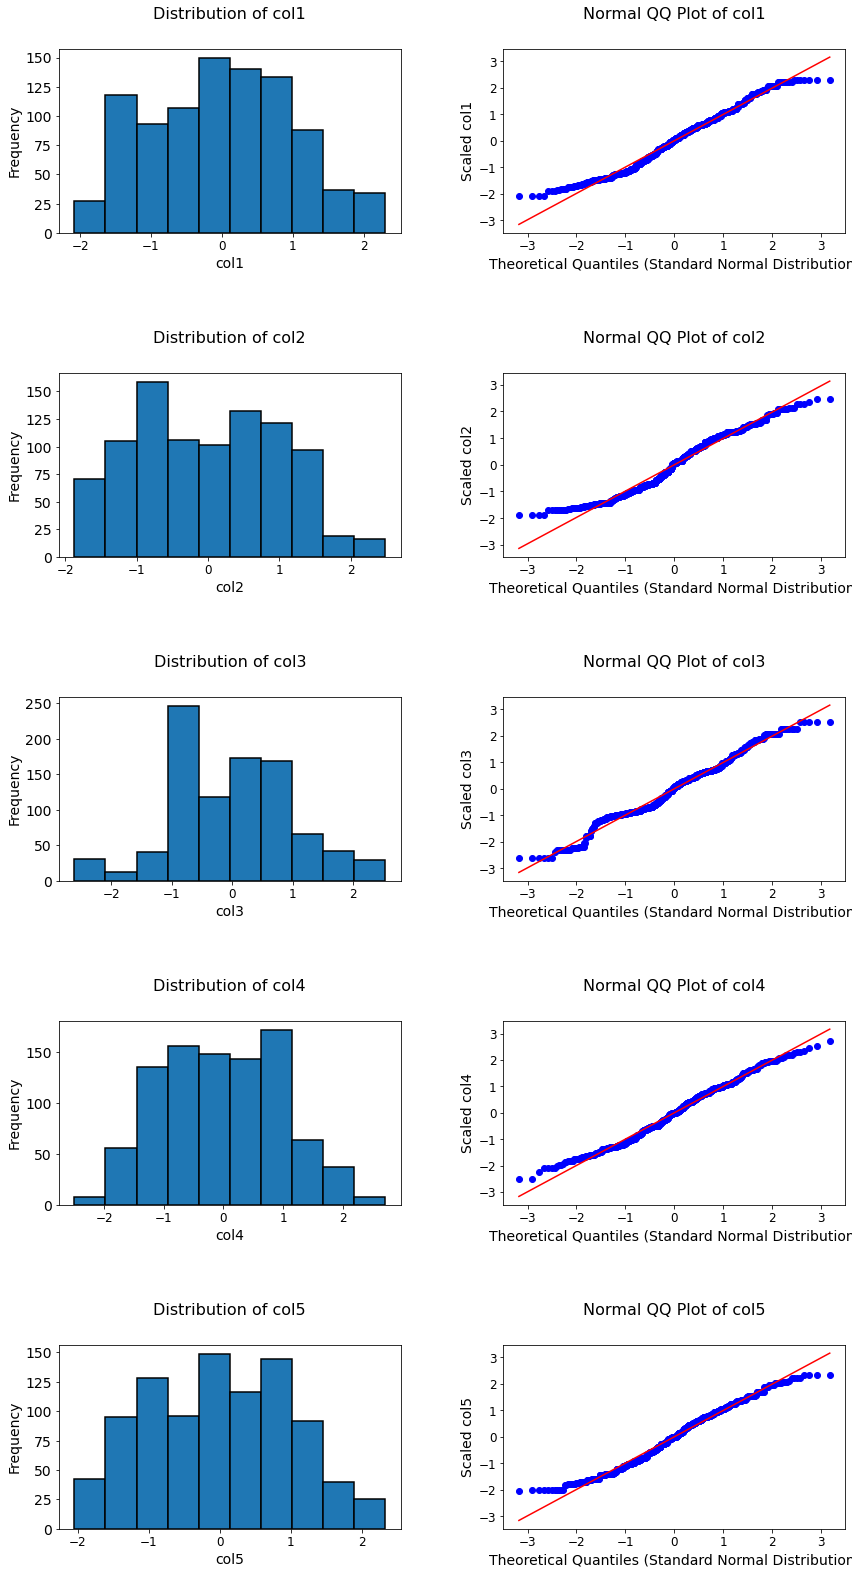

In [106]:
import scipy.stats as stats

plt.figure(figsize=(12,35))

for i in enumerate(data_extracted_transformed.columns[:-1]):
    plt.subplot(8,2,(2*i[0])+1)
    data_extracted_transformed[i[1]].hist(grid=False, xlabelsize=12, lw=1.5, ylabelsize=14, edgecolor = "black")
    plt.title(f"Distribution of {i[1]}",fontsize=16,pad=30)
    plt.xlabel(f"{i[1]}",fontsize=14)
    plt.ylabel("Frequency",fontsize=14)
    plt.tight_layout(h_pad=5, w_pad=5)
    
    plt.subplot(8,2,int(f'{(2*i[0])+2}'))
    stats.probplot(data_extracted_transformed[i[1]], dist='norm', plot=plt)
    plt.title(f'Normal QQ Plot of {i[1]}',fontsize=16,pad=30)
    plt.xlabel("Theoretical Quantiles (Standard Normal Distribution)",fontsize=14)
    plt.ylabel(f"Scaled {i[1]}",fontsize=14)

### ML Modelling on Handpicked Data

Train Validation Split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(data_handpicked_transformed.iloc[:,:-1],data_handpicked_transformed.iloc[:,-1] ,test_size=0.1, random_state=42)

In [56]:
X_train.shape

(834, 5)

In [57]:
X_train.head()

,cement,slag,water,superplasticizer,age
174,-0.174312,-1.055997,-1.088411,1.068938,-1.741615
495,1.016812,0.847860,-1.097989,1.003972,0.113103
684,-0.583629,-1.055997,-1.045334,0.538813,0.612886
710,-0.150630,-1.055997,0.347963,0.352552,0.612886
707,0.139262,-1.055997,0.231208,-1.235094,-1.030521


In [58]:
X_validate

,cement,slag,water,superplasticizer,age
165,0.428206,1.271852,-0.261737,0.635969,-1.030521
430,-0.577734,-1.055997,-1.030983,0.647706,0.612886
30,1.360103,1.103201,0.231208,0.906761,0.612886
67,0.083556,-1.055997,-1.021418,0.782289,0.113103
749,-0.599010,1.352470,0.217182,-1.235094,-1.030521
...,...,...,...,...,...
869,-0.381568,-1.055997,0.659746,0.309443,0.113103
299,-1.168066,0.741273,-0.806665,0.551291,0.612886
720,0.503495,-1.055997,0.696867,0.835275,0.113103
60,0.954610,-1.055997,2.164383,-1.235094,1.952349


# Linear Models

In [60]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.76
r2-Score: 84.31%


In [61]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.79
r2-Score: 84.30%


In [62]:
from sklearn.linear_model import ElasticNet

elnet = ElasticNet(random_state=42)
elnet.fit(X_train, y_train)
y_pred = elnet.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 97.85
r2-Score: 69.75%


In [65]:
from sklearn.linear_model import ARDRegression

ard = ARDRegression()
ard.fit(X_train, y_train)
y_pred = ard.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.77
r2-Score: 84.31%


In [67]:
poly_reg = PolynomialFeatures(degree=4)
X_poly= poly_reg.fit_transform(X_train)
X_poly_validate = poly_reg.transform(X_validate)
lr = LinearRegression()
lr.fit(X_poly, y_train)
y_pred = lr.predict(X_poly_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 18.64
r2-Score: 94.24%


In [70]:
from sklearn.linear_model import HuberRegressor

hr = HuberRegressor()
hr.fit(X_train, y_train)
y_pred = hr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.98
r2-Score: 84.24%


In [71]:
from sklearn.linear_model import TweedieRegressor

tr = TweedieRegressor()
tr.fit(X_train, y_train)
y_pred = tr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 129.72
r2-Score: 59.90%


In [72]:
from sklearn.linear_model import PassiveAggressiveRegressor

par = PassiveAggressiveRegressor(random_state=42)
par.fit(X_train, y_train)
y_pred = par.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 60.65
r2-Score: 81.25%


In [73]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br.fit(X_train, y_train)
y_pred = br.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 50.76
r2-Score: 84.31%


### Kernel Based Model

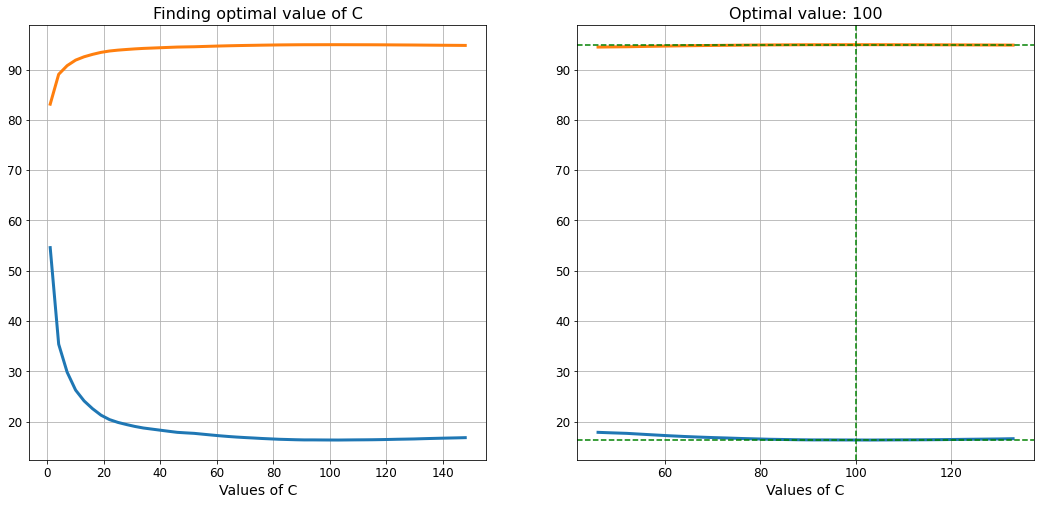

In [74]:
n = range(1,150,3)
vals = [x for x in n]
rmse = []
rtwos = []
for val in vals:    
    svr = SVR(C=val)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_validate)
    rmse.append(mean_squared_error(y_validate, y_pred))
    rtwos.append(r2_score(y_validate, y_pred)*100)

plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'RMSE': rmse, 'r2-scores':rtwos})
plt.title('Finding optimal value of C',fontsize=16)
plt.plot(temp_df, lw = 3, linestyle="-")
plt.xlabel("Values of C",fontsize=14);
plt.grid(True);
plt.plot();

plt.subplot(1,2,2)
plt.title('Optimal value: 100',fontsize=16)
plt.plot(temp_df[15:45], linewidth =3)
plt.xlabel("Values of C",fontsize=14);
plt.axvline(x=100, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=94.95, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=16.3, c='g', linestyle = '--', linewidth =1.5)
plt.grid(True)

In [75]:
svr = SVR(C=100)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 16.34
r2-Score: 94.95%


### Nearest Neighbors Model

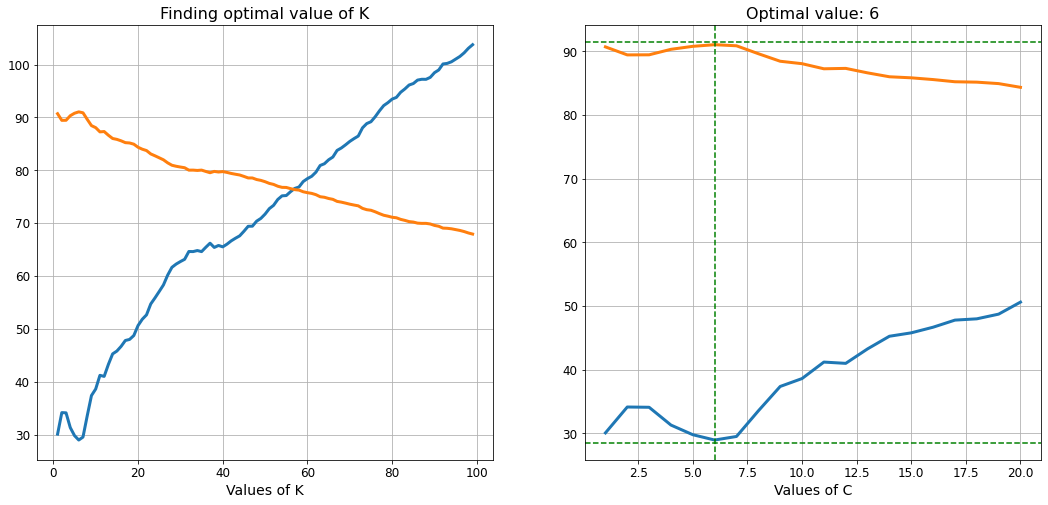

In [76]:
from sklearn.neighbors import KNeighborsRegressor

n = range(1,100)
vals = [x for x in n]
rmse = []
rtwos = []
for val in vals:    
    knn = KNeighborsRegressor(n_neighbors = val)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_validate)
    rmse.append(mean_squared_error(y_validate, y_pred))
    rtwos.append(r2_score(y_validate, y_pred)*100)

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'RMSE': rmse, 'r2-scores':rtwos})
plt.title('Finding optimal value of K',fontsize=16)
plt.plot(temp_df, lw = 3, linestyle="-")
plt.xlabel("Values of K",fontsize=14);
plt.grid(True);
plt.plot();

plt.subplot(1,2,2)
plt.title('Optimal value: 6',fontsize=16)
plt.plot(temp_df[:20], linewidth =3)
plt.xlabel("Values of C",fontsize=14);
plt.axvline(x=6, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=91.5, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=28.5, c='g', linestyle = '--', linewidth =1.5)
plt.grid(True);

In [77]:
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 28.96
r2-Score: 91.05%


In [79]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion ='friedman_mse', random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 28.05
r2-Score: 91.33%


In [ ]:
from sklearn.tree import ExtraTreeRegressor

et = ExtraTreeRegressor(random_state=42)
et.fit(X_train, y_train)
y_pred = et.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

### Ensemble Learning Models

In [82]:
from sklearn.ensemble import AdaBoostRegressor

svr_ada = SVR(C=100)
ada = AdaBoostRegressor(svr_ada, random_state=42, learning_rate=0.05, n_estimators=20)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 16.62
r2-Score: 94.86%


In [ ]:
poly_reg_ada = PolynomialFeatures(degree=4)
X_poly_ada= poly_reg_ada.fit_transform(X_train)
X_poly_validate_ada = poly_reg_ada.transform(X_validate)
lr_ada = LinearRegression()
ada = AdaBoostRegressor(lr_ada, random_state=42, n_estimators=4)
ada.fit(X_poly_ada, y_train)
y_pred = ada.predict(X_poly_validate_ada)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

### Random Forest

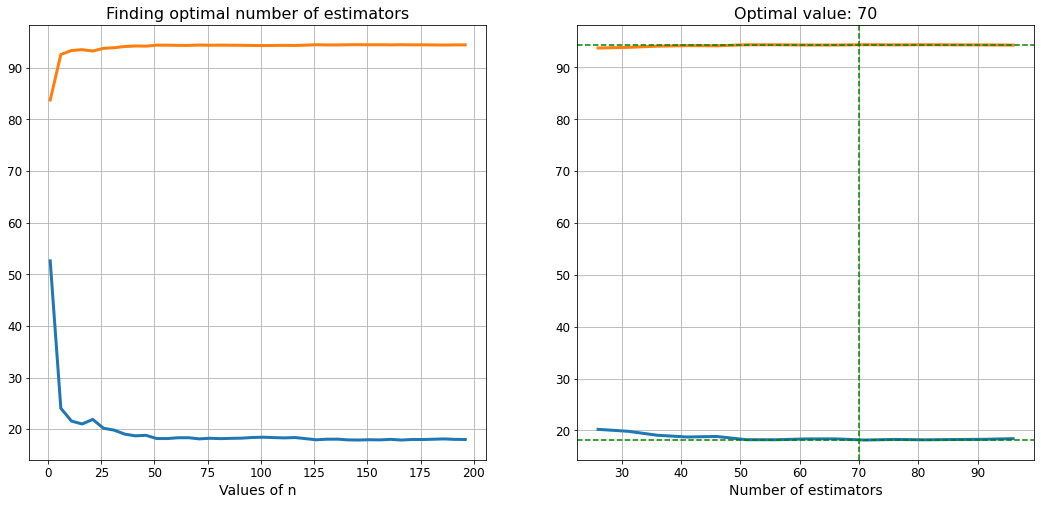

In [83]:
from sklearn.ensemble import RandomForestRegressor

n = range(1,200, 5)
vals = [x for x in n]
rmse = []
rtwos = []
for val in vals:    
    rf = RandomForestRegressor(n_estimators = val, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_validate)
    rmse.append(mean_squared_error(y_validate, y_pred))
    rtwos.append(r2_score(y_validate, y_pred)*100)

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'RMSE': rmse, 'r2-scores':rtwos})
plt.title('Finding optimal number of estimators',fontsize=16)
plt.plot(temp_df, lw = 3, linestyle="-")
plt.xlabel("Values of n",fontsize=14);
plt.grid(True);
plt.plot();

plt.subplot(1,2,2)
plt.title('Optimal value: 70',fontsize=16)
plt.plot(temp_df[5:20], linewidth =3)
plt.xlabel("Number of estimators",fontsize=14);
plt.axvline(x=70, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=94.4, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=18.2, c='g', linestyle = '--', linewidth =1.5)
plt.grid(True);

In [84]:
rf = RandomForestRegressor(n_estimators = 70, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 18.16
r2-Score: 94.39%


#### HISTOGRAM GRADIENT BOOSTING

In [85]:
# from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
hgbr = HistGradientBoostingRegressor(random_state=42)
hgbr.fit(X_train, y_train)
y_pred = hgbr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 13.77
r2-Score: 95.74%


### Bagging

### Bagging for SVR

In [86]:
from sklearn.ensemble import BaggingRegressor

svr_bag = SVR(C=100)
bag = BaggingRegressor(base_estimator= svr_bag, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 17.48
r2-Score: 94.60%


### Bagging for Polynomial Linear Regression

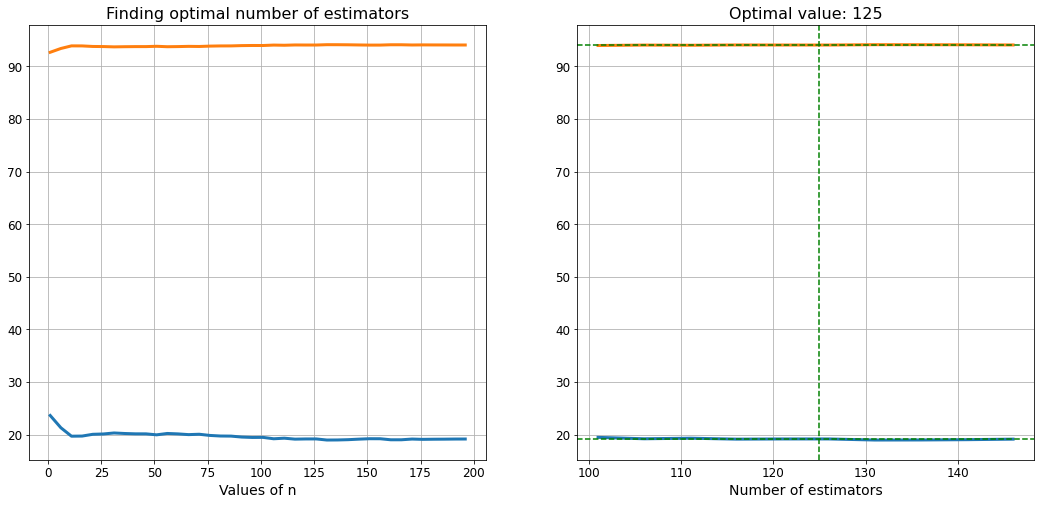

In [87]:
from sklearn.ensemble import BaggingRegressor

poly_reg_bag = PolynomialFeatures(degree=4)
X_poly_bag= poly_reg_bag.fit_transform(X_train)
X_poly_validate_bag = poly_reg_bag.transform(X_validate)
lr_bag = LinearRegression()


n = range(1,200, 5)
vals = [x for x in n]
rmse = []
rtwos = []
for val in vals:    
    bag = BaggingRegressor(base_estimator= lr_bag, random_state=42, n_estimators=val)
    bag.fit(X_poly_bag, y_train)
    y_pred = bag.predict(X_poly_validate_bag)
    rmse.append(mean_squared_error(y_validate, y_pred))
    rtwos.append(r2_score(y_validate, y_pred)*100)

    
plt.figure(figsize=(18,8))
    
plt.subplot(1,2,1)
temp_df = pd.DataFrame(index = vals, data={'RMSE': rmse, 'r2-scores':rtwos})
plt.title('Finding optimal number of estimators',fontsize=16)
plt.plot(temp_df, lw = 3, linestyle="-")
plt.xlabel("Values of n",fontsize=14)
plt.grid(True)
plt.plot()

plt.subplot(1,2,2)
plt.title('Optimal value: 125',fontsize=16)
plt.plot(temp_df[20:30], linewidth =3)
plt.xlabel("Number of estimators",fontsize=14)
plt.axvline(x=125, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=94, c='g', linestyle = '--', linewidth =1.5)
plt.axhline(y=19.2, c='g', linestyle = '--', linewidth =1.5)
plt.grid(True)


In [88]:
from sklearn.ensemble import BaggingRegressor

poly_reg_bag = PolynomialFeatures(degree=4)
X_poly_bag= poly_reg_bag.fit_transform(X_train)
X_poly_validate_bag = poly_reg_bag.transform(X_validate)
lr_bag = LinearRegression()
bag = BaggingRegressor(base_estimator= lr_bag, random_state=42, n_estimators=125)
bag.fit(X_poly_bag, y_train)
y_pred = bag.predict(X_poly_validate_bag)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 19.19
r2-Score: 94.07%


In [89]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(random_state=42)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')

RMSE: 12.92
r2-Score: 96.00%


#### Voting Regressor

In [90]:
from sklearn.ensemble import VotingRegressor

svr_vote = SVR(C=100)
hgbr_vote = HistGradientBoostingRegressor(random_state=42)
xgbr_vote = XGBRegressor(random_state=42)

vote = VotingRegressor(estimators = [
    ('svr_vote', svr_vote),
    ('hgbr_vote', hgbr_vote),
    ('xgbr_vote', xgbr_vote)
])

vote.fit(X_train, y_train)
y_pred = vote.predict(X_validate)
print(f'RMSE: {mean_squared_error(y_validate, y_pred):.2f}\nr2-Score: {r2_score(y_validate, y_pred)*100:.2f}%')


RMSE: 10.38
r2-Score: 96.79%


### Model Performance on Test Data

In [91]:
test.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74.50
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28,10.54


In [ ]:
for idx, row in test.iterrows():
    if test.loc[idx, 'slag']> 350:
        test.loc[idx, 'slag'] = 350
        
    if test.loc[idx, 'water']> 230:
        test.loc[idx, 'water'] = 230
        
    if test.loc[idx, 'water']< 124:
        test.loc[idx, 'water'] = 124
        
    if test.loc[idx, 'superplasticizer']> 25:
        test.loc[idx, 'superplasticizer'] = 25
        
    if test.loc[idx, 'fineaggregate']> 970:
        test.loc[idx, 'fineaggregate'] = 970

In [92]:
for idx, row in test.iterrows():
    if test.loc[idx, 'age']> 120:
        test.loc[idx, 'age'] = 120
        
    if test.loc[idx, 'age']== 1:
        test.loc[idx, 'age'] = 2
        
    if test.loc[idx, 'age']== 3:
        test.loc[idx, 'age'] = 2
        
    if test.loc[idx, 'age']== 91:
        test.loc[idx, 'age'] = 90

In [93]:
mylist = [28, 2, 7, 56, 90, 120, 14, 100]
mydict = {}
mylist.sort()
for (x,y) in enumerate(mylist):
    mydict[y]=x
    
    
print(mydict)

d = 50
takeClosest = lambda num,collection:min(collection,key=lambda x:abs(x-num))
print(takeClosest(d, mylist))
print(mydict[takeClosest(d, mylist)])

{2: 0, 7: 1, 14: 2, 28: 3, 56: 4, 90: 5, 100: 6, 120: 7}
56
4


In [94]:
for idx, row in test.iterrows():
    test.loc[idx, 'age'] = mydict[takeClosest(test.loc[idx, 'age'], mylist)]
    

In [95]:
test.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,strength
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,7,52.91
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,1,55.90
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,3,74.50
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,0,35.30
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,3,10.54


In [96]:
test.age.value_counts()

3    38
0    16
1    14
2     8
7     7
5     7
4     7
6     6
Name: age, dtype: int64

In [97]:
test_handpicked = test[['cement', 'slag', 'water', 'superplasticizer', 'age', 'strength']]
test_handpicked.head()

,cement,slag,water,superplasticizer,age,strength
31,266.0,114.0,228.0,0.0,7,52.91
109,362.6,189.0,164.9,11.6,1,55.90
136,389.9,189.0,145.9,22.0,3,74.50
88,362.6,189.0,164.9,11.6,0,35.30
918,145.0,0.0,202.0,8.0,3,10.54


In [98]:
test_transformed=transformer_handpicked.transform(test_handpicked.iloc[:,:-1])
test_transformed.shape

(103, 5)

In [99]:
test_transformed = pd.DataFrame(test_transformed, columns = test_handpicked.columns.tolist()[:-1])
test_transformed['strength'] = test_handpicked['strength'].tolist()
print(test_transformed.shape)
test_transformed.head()


(103, 6)


,cement,slag,water,superplasticizer,age,strength
0,-0.004324,0.915796,2.164383,-1.235094,1.952349,52.91
1,0.825125,1.131276,-0.763820,0.956049,-1.030521,55.90
2,1.026116,1.131276,-1.676020,1.761775,0.113103,74.50
3,0.825125,1.131276,-0.763820,0.956049,-1.741615,35.30
4,-1.502522,-1.055997,0.974570,0.563670,0.113103,10.54


In [100]:
y_pred = vote.predict(test_transformed.iloc[:,:-1])
print(f'RMSE: {mean_squared_error(test_transformed.iloc[:,-1], y_pred):.2f}\nr2-Score: {r2_score(test_transformed.iloc[:,-1], y_pred)*100:.2f}%')

RMSE: 18.69
r2-Score: 92.97%


### Selected Model: Voting Regressor

In [101]:
vote

VotingRegressor(estimators=[('svr_vote', SVR(C=100)),
                            ('hgbr_vote',
                             HistGradientBoostingRegressor(random_state=42)),
                            ('xgbr_vote',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, g...one,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...))])

In [102]:
performance_df = pd.DataFrame({"Metric": ['RMSE', 'r2-score'], "Validation-set performance": ['10.38', '0.97'], "Test-set performance": ['18.69', '0.93']})
performance_df.set_index('Metric', inplace=True)
performance_df

,Validation-set performance,Test-set performance
Metric,,
RMSE,10.38,18.69
r2-score,0.97,0.93


In [103]:
filename = 'transformer.sav'
joblib.dump(transformer_handpicked, filename)

['transformer.sav']

In [105]:
filename = 'model.sav'
joblib.dump(vote, filename)

['model.sav']